# Prueba técnica Data Coordinator iFood

In [167]:
#Loading Liberies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
#Loading Dataset 
df = pd.read_csv("diabetes_data.csv")


### Data preparation and exploration

In [169]:
#Displaying first 15 line and transposing the the result
df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236,36900,40926,42570,62256
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032,77391171,85504905,77586282,49726791
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican
gender,Female,Female,Female,Male,Male,Male,Male,Male,Female,Female,Female,Male,Female,Male,Female
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),[40-50),[60-70),[40-50),[80-90),[60-70)
weight,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1,2,3,1,2,1,1,3
discharge_disposition_id,25,1,1,1,1,1,1,1,1,3,1,1,3,6,1
admission_source_id,1,7,7,7,7,2,2,7,4,4,7,4,7,7,2
time_in_hospital,1,3,2,2,1,3,4,5,13,12,9,7,7,10,1


The above dataset has both numerical and categorical (non-numerical) variables. However, there appears to be a lot of missing variables as well. We need to further explore this dataset to see the extent of the missing variable.

In [170]:
#reviewing the shape of the dataset. This data set has 101766 lines and 50 columns
df.shape

(101766, 50)

In [171]:
#Checking for the type of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### Removing Missing variables

In [172]:
#Count the amount of missing variable in each column
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


The columns weight, payer_code and medical_specialty have a lot of missing values. Interestingly, gender returns a count of zero. Let's explore this a bit more.

In [173]:
df['gender'].unique() #Some of the value for gender were not properly labeled and hence we have an 'Unknown/Invalid' gender.

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

The question mark sign (?) represents missing variables. I am going to replace the question marks (?) with NA.  

In [174]:
df.replace('?',np.nan,inplace=True)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [175]:
#Almost all of the values in the the column weight are missing and a large amount of the value in medical_speciality and
#payer_code are also missing. I will drop these columns since they won't for further analysis
df.drop(['weight','medical_specialty','payer_code'],axis=1,inplace=True)
#gender for those patients are unknow.
df=df[df['gender']!='Unknown/Invalid']
# The columns diag_1, diag_2, diag_3 and race also have missing values (NAs), the below function will drop the 
#rows where these missing values were found. 
df.dropna(inplace=True)


In [176]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [177]:
display(df.columns) # Confirming that the columns were successfully removed.

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [178]:
df.shape

(98052, 47)

In [179]:
display(df)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO


Este dataset se trata de personas con diabetes. La idea de este analysis es constuir un modelo basado en los datos que va a predicir la probabilidad que una persona va a ser readmitida al hospital o no.

In [180]:
df['readmitted'].unique() #test

array(['>30', 'NO', '<30'], dtype=object)

## En este dataset, el variable dependiente es 'readmitted'. Ese es el variable voy a tratar de predecir.

Text(0, 0.5, 'Count')

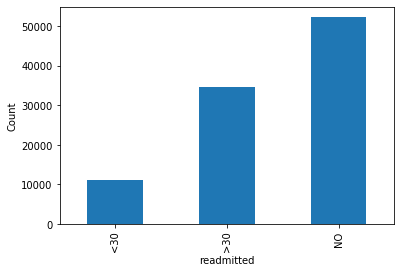

In [181]:
# the dependent variable readmitted has three categories: <30 (readmitted in less than 30 days), > 30 (readmitted after 30 days)
# and No (patients were not readmitted).
# 11% of patients were readmitted within 30 days (<30)
# 35% of patients were readmitted after 30 days (>30)
# 54% of patients were never readmitted (NO)
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [182]:
df[df['readmitted'] == '<30'].shape[0] * 1.0 / df.shape[0] # 11.3% of patients readmitted under 30 days

0.11285848325378371

In [183]:
df[df['readmitted'] == '>30'].shape[0] * 1.0 / df.shape[0] # 35.3% of patients readmitted after 30 days

0.35337372006690326

In [184]:
df[df['readmitted'] == 'NO'].shape[0] * 1.0 / df.shape[0] # 53.4% of patients were never readmitted. 

0.5337677966793131

In [185]:
# The dependent/response variable needs to be recoded so that it's a binary classification.
# '0' means no readmission
# '1' means readmission no matter how many days after being discharged
df['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in df['readmitted']])
#df.dropna()
#df.dropna(inplace=True)
#data_origin = df

In [186]:
df.shape

(98052, 47)

In [187]:
df['readmitted'].unique() #test

array([ 0.,  1., nan])

In [188]:
df['readmitted'].isnull().sum() # There are 3576 na values in the column 'readmitted'. I will replace these values with zero.

3576

In [189]:
df1 = df.dropna()
display(df1)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0.0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0.0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0.0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,1.0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98046,396041360,111506031,AfricanAmerican,Male,[50-60),3,1,7,7,87,...,No,Down,No,No,No,No,No,Ch,Yes,1.0
98047,396041378,100111914,Caucasian,Male,[60-70),2,1,7,2,32,...,No,Steady,No,No,No,No,No,Ch,Yes,1.0
98048,396041390,97699437,Caucasian,Male,[80-90),1,2,7,6,68,...,No,No,No,No,No,No,No,No,No,0.0
98049,396041570,85821255,Caucasian,Male,[80-90),1,6,7,4,72,...,No,No,No,No,No,No,No,No,No,0.0


Text(0, 0.5, 'Count')

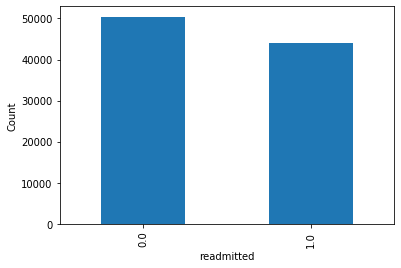

In [190]:
# plotting 'readmitted' again to visualize changes
df1.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

# Feature Engineering. Explorando los variables diferentes para ver cual es la mejor forma de tratar con cada uno.

Text(0, 0.5, 'Count')

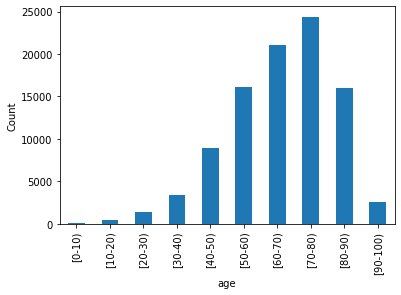

In [191]:
# Graphing 'age' feature
df1.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

C:\Users\IFOOD\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\IFOOD\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Count')

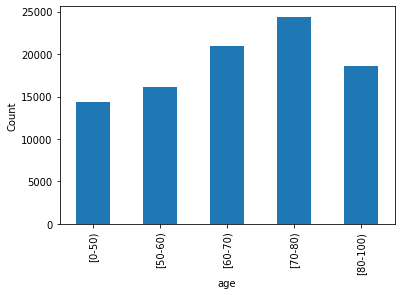

In [192]:
# Seems like the majority of the patients admitted were between 50 and 90. I am going to recategorize age so that the is a more
# even distribution
df1['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                         for val in df1['age']], index=df1.index)
df1['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                         for val in df1['age']], index=df1.index)

df1.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')

In [193]:
# According to the file IDs_Mapping (which was downloaded with the diabetes dataset) the column 'discharge_disposition_id' contains 28 levels
# In order to simplify this column, I will reduce this column to only two categories. 
# discharge_disposition_id = 1 relates to 'Discharge Home'
df1['discharge_disposition_id'] = pd.Series(['Home' if val == 1 else 'Other discharge' 
                                              for val in df1['discharge_disposition_id']], index=df1.index)

C:\Users\IFOOD\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [194]:
#The file IDs_Mapping shows that admission_source_id contains 25 levels. The different ids refers to how the patients were admitted
# In order to simplify this column, I will reduce this column into 3 categories.
df1['admission_source_id'] = pd.Series(['Emergency Room' if val == 7 else 'Referral' if val == 1 else 'Other source' 
                                              for val in df1['admission_source_id']], index=df1.index)

C:\Users\IFOOD\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [195]:
# The file IDs_Mapping shows that 'admission_type_id' contains 8 levels
# For simplicity, I will reduce 'admission_type_id' into 2 categories
df1['admission_type_id'] = pd.Series(['Emergency' if val == 1 else 'Other type' 
                                              for val in df1['admission_type_id']], index=df1.index)

C:\Users\IFOOD\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


-Hay 23 diferentes tipo de medicamentos en el dataset.

-Después de hacer unas investigaciones en el internet, me he dados cuenta que los seguientes medicamentos: acarbose, miglitol, 
nateglinide and insulin son medicamentos comunes en el tratamiento de diabetes. Vamos a explorar más esos 4 medicamentos.

-Otro tema importante es cómo debo tratar con las columnas diag_1, diag_2 y diag_3? Basado en los resultados de este estudio: https://www.hindawi.com/journals/bmri/2014/781670/, "The statistical model suggests that the relationship between the probability of readmission and the HbA1c measurement depends on the primary diagnosis." Es decir, la relación entre la probabilidad de readmisión y HbA1C measurement (una prueba de diabetes) depende mucho del primary diagnosis (que fue el diagnóstico cuando el paciente fue admitida por la primera vez.) Entonces, basado en estudios previos relacionado al mismo tema, puedo quitar las columnas diag_2 y diag_3 y enfocarnos en diag1.

-El primer, segundo y tercer diagnosis (diag_1, diag_2, diag_3) tiene un código ICD9. El código de diabetes es 250.xx 



Text(0, 0.5, 'Count')

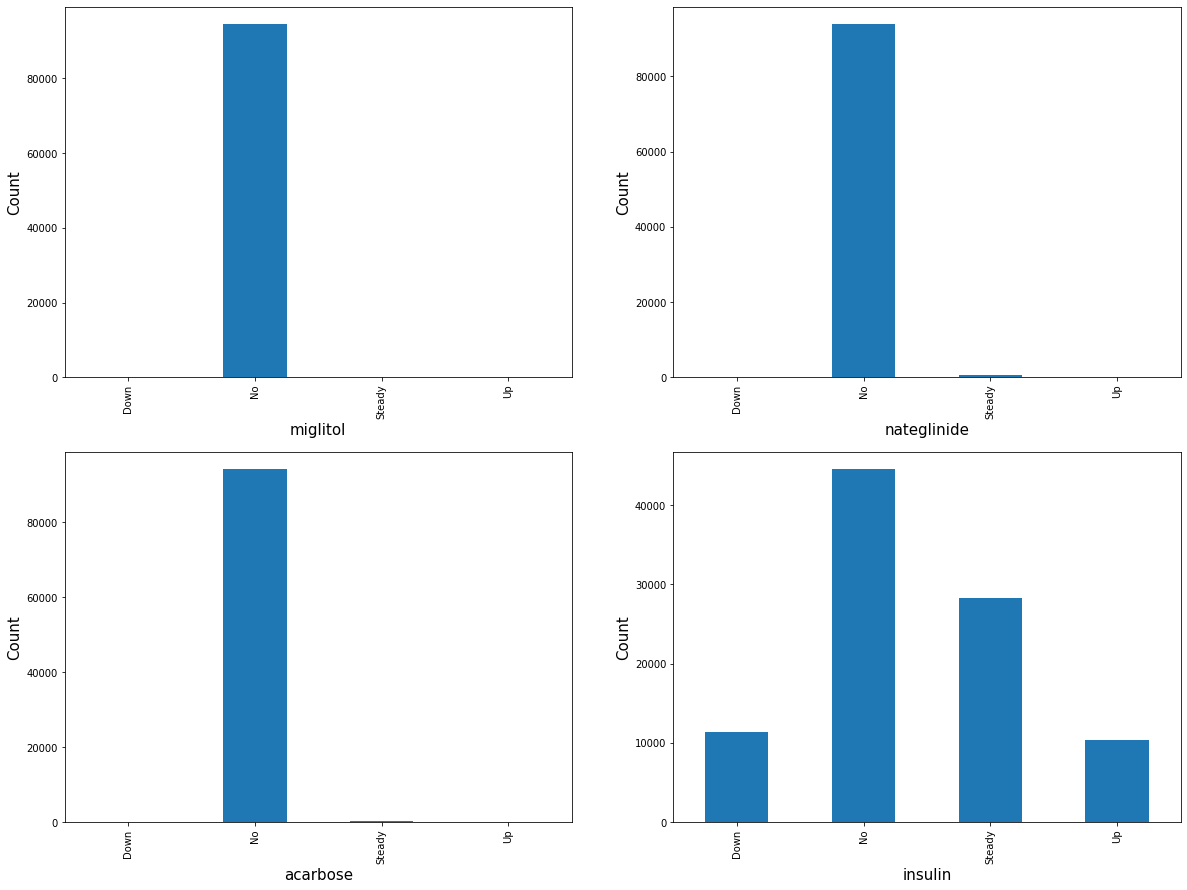

In [196]:
# I am comparing the 4 main diabetes medications 'miglitol', 'nateglinide' and 'acarbose' with 'insulin' to see their variation.
fig_dim = plt.figure(figsize=(20,15))

ax1 = fig_dim.add_subplot(221)
ax1 = df1.groupby('miglitol').size().plot(kind='bar')
plt.xlabel('miglitol', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax2 = fig_dim.add_subplot(222)
ax2 = df1.groupby('nateglinide').size().plot(kind='bar')
plt.xlabel('nateglinide', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax3 = fig_dim.add_subplot(223)
ax3 = df1.groupby('acarbose').size().plot(kind='bar')
plt.xlabel('acarbose', fontsize=15)
plt.ylabel('Count', fontsize=15)

ax4 = fig_dim.add_subplot(224)
ax4 = df1.groupby('insulin').size().plot(kind='bar')
plt.xlabel('insulin', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [197]:
# De los 4 medicamentos de diabetes arriba, el único que fue usado bastante fue insulin. Los otros 3 casi no fueron usado.
# Vamos a quedar con insulin y quitar lo demás de medicamentos.

df1.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
           'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 
           'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
           'metformin-rosiglitazone', 'metformin-pioglitazone'], axis=1, inplace=True)

C:\Users\IFOOD\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [198]:
# Como ya indique arriba, diag_2 y diag_3 podemos quitar, porque basado en estudios, diag_1 es el 'diagnosis' que es mejor correlacionado con readmisión. 
# Además, vamos a modificar la columna 'diag_1' usando binary classification. Es decir, 'diag_1' es 1 si el primer 'diagnosis' fue relacionado con diabetes y al contrario 0.
df1['diag_1'] = pd.Series([1 if val.startswith('250') else 0 for val in df1['diag_1']], index=df1.index)
df1.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

C:\Users\IFOOD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [199]:
df1.shape

(94476, 23)

In [200]:
list(df1.columns.values)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'insulin',
 'change',
 'diabetesMed',
 'readmitted']

In [201]:
# These two columns doesn't add much to the analysis and I am going to drop them.
df1.drop(['encounter_id', 'patient_nbr'], axis = 1, inplace = True)

In [202]:
df1.shape # After all of the the manipulation, we now have 20 variables and one dependent/response variable (readmitted).

(94476, 21)

# Data Preprocessing

In [203]:
#In order to use the categorical variables in our model, we need to represent each categorical varible in the form of 1 and zeros.
#I will now use one hot encoding in order to transform the categorical variables to dummy variables. 
age_df = pd.get_dummies(df1['age'])
race_df = pd.get_dummies(df1['race'])
gender_df = pd.get_dummies(df1['gender'])
max_glu_serum_df = pd.get_dummies(df1['max_glu_serum'])
A1Cresult_df = pd.get_dummies(df1['A1Cresult'])
insulin_df = pd.get_dummies(df1['insulin'])
change_df = pd.get_dummies(df1['change'])
diabetesMed_df = pd.get_dummies(df1['diabetesMed'])
discharge_disposition_id_df = pd.get_dummies(df1['discharge_disposition_id'])
admission_source_id_df = pd.get_dummies(df1['admission_source_id'])
admission_type_id_df = pd.get_dummies(df1['admission_type_id'])

df1 = pd.concat([df1, age_df, race_df, gender_df, max_glu_serum_df, A1Cresult_df, 
                  insulin_df, change_df, diabetesMed_df, discharge_disposition_id_df, 
                  admission_source_id_df, admission_type_id_df], axis=1)
df1.drop(['age', 'race', 'gender', 'max_glu_serum', 'A1Cresult', 'insulin', 'change', 
                  'diabetesMed', 'discharge_disposition_id', 'admission_source_id', 
                  'admission_type_id'], axis=1, inplace=True)


In [206]:
# get list of the originial numeric features
num_col = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
         'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']
num_col

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'number_inpatient',
 'number_emergency',
 'number_outpatient']

In [208]:
stat_numeric_features = pd.DataFrame()
stat_numeric_features['numeric_column'] = num_col
skewness = []

kurtosis = []

standard_deviation = []

for i in num_col:
    skewval = df1[i].skew()
    skewness.append(skewval)
    
    kurtval = df1[i].kurtosis()
    kurtosis.append(kurtval)
    
    sdval = df1[i].std()
    standard_deviation.append(sdval)
    
stat_numeric_features['skewness'] = skewness
stat_numeric_features['kurtosis'] = kurtosis
stat_numeric_features['standard_deviation'] = standard_deviation   

In [209]:
display(stat_numeric_features)

,numeric_column,skewness,kurtosis,standard_deviation
0,time_in_hospital,1.118130,0.796762,2.999406
1,num_lab_procedures,-0.234558,-0.231062,19.628669
2,num_procedures,1.300916,0.823218,1.703868
3,num_medications,1.343425,3.541473,8.114255
4,number_diagnoses,-0.813928,-0.454152,1.836374
5,number_inpatient,3.550647,19.997153,1.268368
6,number_emergency,23.212643,1220.724931,0.939094
7,number_outpatient,8.658152,141.259258,1.265576


In the cells above. I tested for skewness and kurtosis in the original numeric features. Skewness tells you how the data is 
distributed (Normally, Skewed to the left or skewed to the right) and kurtosis tells us whether the data/features have a lot of 
outliers. As a general rule of thumb, if skewness is less than -1 or greater than 1, the distribution is highly skewed. With respect to kurtosis, if it is less than -2 or greater than 2, there is strong evidence for kurtosis.Further information about 
skewness and kurtosis can be found here: https://brownmath.com/stat/shape.htm. In the above table, there is strong evidence that the features 'number_inpatient', 'number_emergency' and 'number_outpatient' have high kurtosis and high right skewness. These variables have to be transformed to correct for skewness and kurtosis. 

In [210]:
# applying square root transformation on right skewed count data to reduce the effects of extreme values.
#Literature on appropriate methods of transformation: http://fmwww.bc.edu/repec/bocode/t/transint.html
df1['number_outpatient'] = df1['number_outpatient'].apply(lambda x: np.sqrt(x + 0.5))
df1['number_emergency'] = df1['number_emergency'].apply(lambda x: np.sqrt(x + 0.5))
df1['number_inpatient'] = df1['number_inpatient'].apply(lambda x: np.sqrt(x + 0.5))

In [211]:
# The numeric features need to be standardized so that the mean is zero and variance is one
features_to_scale = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_diagnoses', 'number_inpatient', 'number_emergency', 'number_outpatient']

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df1[features_to_scale])
data_scaler = scaler.transform(df1[features_to_scale])

data_scaler_df = pd.DataFrame(data=data_scaler, columns=features_to_scale, index=df1.index)
df1.drop(features_to_scale, axis=1, inplace=True)
df1 = pd.concat([df1, data_scaler_df], axis=1)



In [212]:
df1

,diag_1,readmitted,[0-50),[50-60),[60-70),[70-80),[80-100),AfricanAmerican,Asian,Caucasian,...,Emergency,Other type,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,number_inpatient,number_emergency,number_outpatient
1,0,0.0,1,0,0,0,0,0,0,1,...,1,0,-0.477912,0.805500,-0.792514,0.235280,0.825512,-0.609212,-0.301005,-0.374475
2,0,0.0,1,0,0,0,0,1,0,0,...,1,0,-0.811313,-1.639916,2.142001,-0.380923,-0.808151,0.565085,-0.301005,1.905113
3,0,0.0,1,0,0,0,0,0,0,1,...,1,0,-0.811313,0.041308,-0.205611,-0.011201,-0.263597,-0.609212,-0.301005,-0.374475
4,0,1.0,1,0,0,0,0,0,0,1,...,1,0,-1.144714,0.397931,-0.792514,-0.997126,-1.352706,-0.609212,-0.301005,-0.374475
5,0,0.0,0,1,0,0,0,0,0,1,...,0,1,-0.477912,-0.620992,2.728904,-0.011201,0.825512,-0.609212,-0.301005,-0.374475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98046,0,1.0,0,1,0,0,0,1,0,0,...,0,1,0.855693,2.231992,1.555098,2.823331,0.825512,1.373589,3.925129,-0.374475
98047,0,1.0,0,0,1,0,0,0,0,1,...,0,1,-0.811313,-0.570046,-0.792514,0.728242,0.825512,-0.609212,1.578832,-0.374475
98048,0,0.0,0,0,0,0,1,0,0,1,...,1,0,0.522292,1.264015,2.142001,1.590926,0.825512,2.030770,-0.301005,0.975592
98049,0,0.0,0,0,0,0,1,0,0,1,...,1,0,-0.144511,1.467800,-0.792514,0.235280,0.825512,0.565085,-0.301005,1.905113


# Feature Importance

#### Use ensemble method to evaluate the importance of different features 

In [213]:
# making X (features) and y (response)
X = df1.drop(['readmitted'], axis=1)
y = df1['readmitted']


In [216]:
y.isnull().sum()
#print (X.shape)
#print (y.sh

0

In [217]:
# X and Y will now be split into cross-validation (70%) (training) and 30% (testing).

from sklearn.model_selection import train_test_split
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.30)

print(X_cv.shape, y_cv.shape)

print(X_test.shape, y_test.shape)




(66133, 44) (66133,)
(28343, 44) (28343,)


C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Top 7 features are: 
num_lab_procedures
num_medications
time_in_hospital
number_diagnoses
num_procedures
number_inpatient
number_outpatient


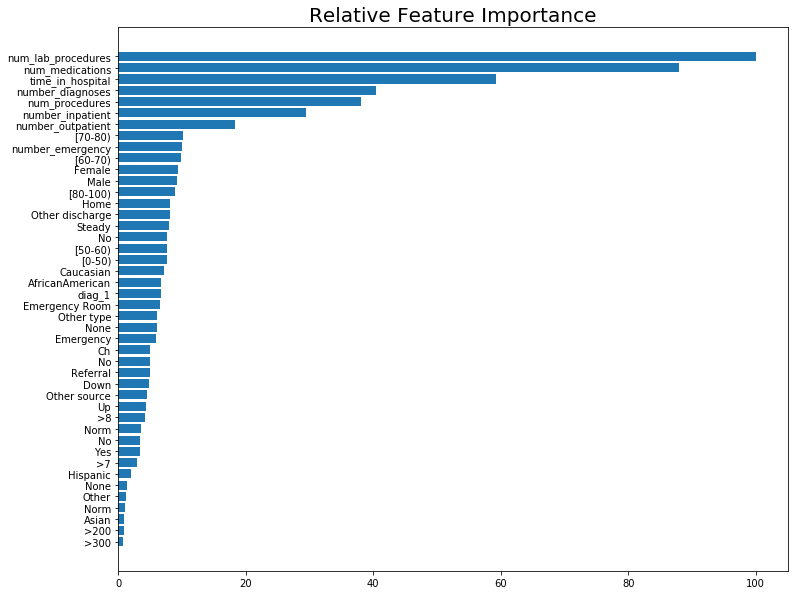

In [221]:
# fit Random Forest model to the cross-validation data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_cv, y_cv)
importances = forest.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X_cv.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 7 features are: ')
for feature in feature_names_sort[::-1][:7]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()


From the above graph, we can see that the 7 features with the greatest relation to readmission are: num_lab_procedures,
num_medications, time_in_hospital, number_diagnoses, num_procedures, number_inpatient, number_outpatient.


In [230]:
#I will now make a smaller feature set  with only the top 7 features according to the importance above.

# make a smaller feature set which only contains the top 6 features
X_cv_top7 = X_cv[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_diagnoses',
           'number_inpatient']]


# Model selection

I will now compare the performance of two machine learning algorithms: Logistic Regression and Random Forest (Classifier). I chose these two models because there implementation is simple and they they tend to perform well on classification problems. We will be using accuracy to evaluate the performance of the model. 

In [226]:
from sklearn.model_selection import cross_val_score

In [227]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_cv, cv=10, scoring='accuracy').mean()
RF_score

C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.5125124930318639

In [228]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
LR_score = cross_val_score(clf3, X_cv, y_cv, cv=10, scoring='accuracy').mean()
LR_score

C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.5328202584174239

Text(0, 0.5, 'Cross-Validated Accuracy')

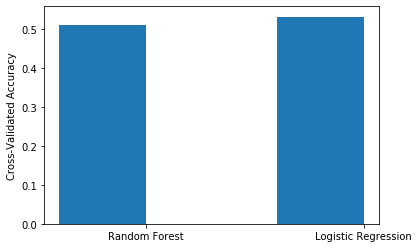

In [229]:
# plot and compare the scores
# LR outperforms the other two a little bit
x_axis = np.arange(2)
y_axis = [RF_score, LR_score]
plt.bar(x_axis, y_axis, width=0.4)
plt.xticks(x_axis + 0.4/2., ('Random Forest', 'Logistic Regression'))
plt.ylabel('Cross-Validated Accuracy')

In [231]:
# Logistic Regression on Top 6 features
# still be able to achieve good result with reduced running time
LR_score_top = cross_val_score(clf3, X_cv_top7, y_cv, cv=10, scoring='accuracy').mean()
LR_score_top

C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IFOOD\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.5330168020389964

As we can see above, the logistic regression has a slightly higher accuracy than the Random Forest (53.28% to 51.25%). When using only the top 7 feature, as shown in the cell above, the accuracy in still greater than 53%. This shows that with only the top 7 variables, we can have a comparable prediction and significantly reduce run time.

The accuracy of a machine learning classification algorithm is one way to measure how often the algorithm classifies a data point correctly. Accuracy is the number of correctly predicted data points out of all the data points. This articles gives a comprehensive explanaiton of accuracy: 

# Hyper parameter optimization and evaluation metrics are the next two steps in this process. Because of time constraints, I will skip this step, but it can definitely be discussed further.

# Conclusions
-Seven major features can be said to have significant impact on diabetes patient readmission: num_lab_procedures, num_medications, time_in_hospital, number_diagnoses, num_procedures, number_inpatient, number_outpatient. 

-The logistic regression classifier model achieved a 53% accuracy without tuning. With parameter tuning. The accuracy will likely increase.

-The results may be futher improve by doig more feature engineering and also by using more complex models like a Naive Bayes Classifier or a Neural network